In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CC GENERAL.csv to CC GENERAL.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
creditcard_df=pd.read_csv("CC GENERAL.csv")
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
print('The shape of creditcard data  is:  ',creditcard_df.shape)

The shape of creditcard data  is:   (8950, 18)


In [ ]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
creditcard_df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

<Axes: >

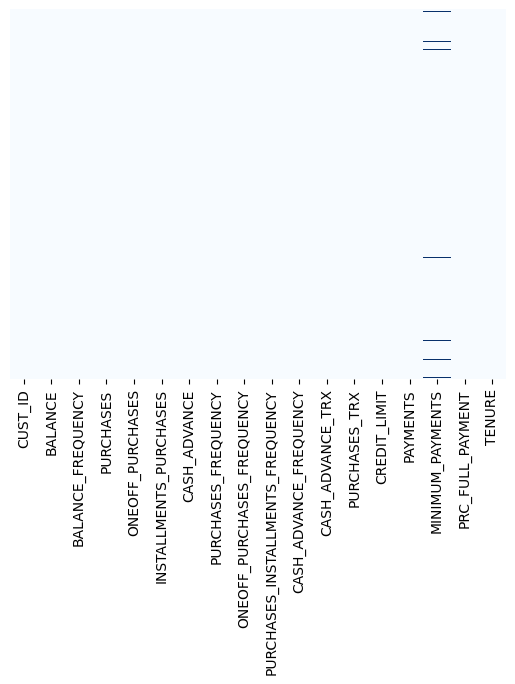

In [ ]:
sns.heatmap(creditcard_df.isnull(),yticklabels=False,cbar=False,cmap="Blues")

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
missing_var=[var for var in creditcard_df.columns if creditcard_df[var].isnull().sum()>0]
missing_var

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']

In [ ]:
creditcard_df["MINIMUM_PAYMENTS"]=creditcard_df["MINIMUM_PAYMENTS"].fillna(creditcard_df["MINIMUM_PAYMENTS"].mean())
creditcard_df.dropna(subset=['CREDIT_LIMIT'], axis=0, inplace=True)

In [ ]:
creditcard_df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
creditcard_df.duplicated().sum()

0

In [ ]:
creditcard_df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [ ]:
data=creditcard_df.copy()

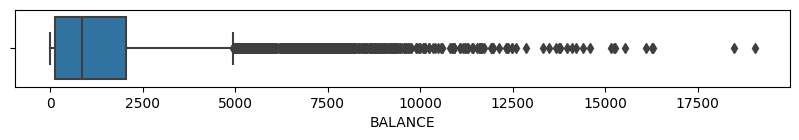

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='BALANCE', data= creditcard_df);

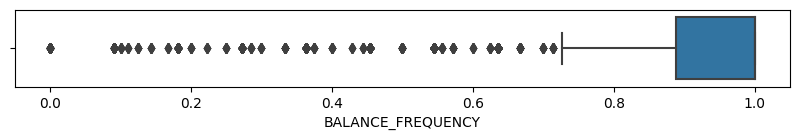

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='BALANCE_FREQUENCY', data= creditcard_df);

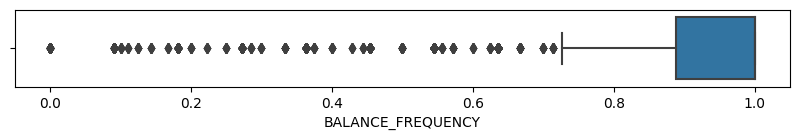

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='BALANCE_FREQUENCY', data= creditcard_df);

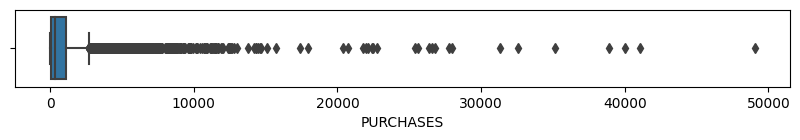

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='PURCHASES', data= creditcard_df);

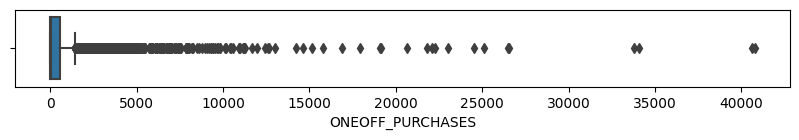

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='ONEOFF_PURCHASES', data= creditcard_df);

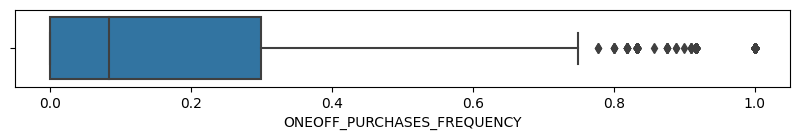

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='ONEOFF_PURCHASES_FREQUENCY', data= creditcard_df);

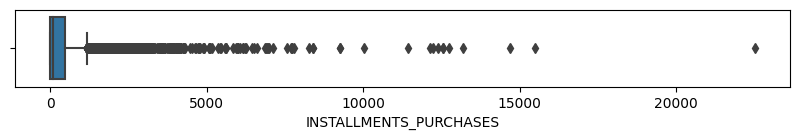

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='INSTALLMENTS_PURCHASES', data= creditcard_df);

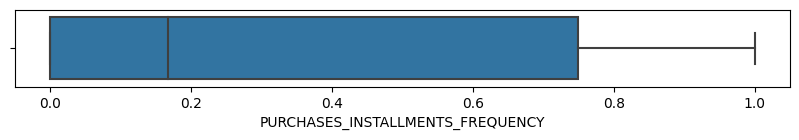

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='PURCHASES_INSTALLMENTS_FREQUENCY', data= creditcard_df);

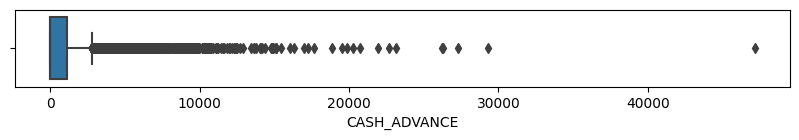

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='CASH_ADVANCE', data= creditcard_df);

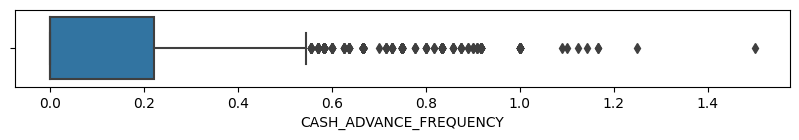

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='CASH_ADVANCE_FREQUENCY', data= creditcard_df);

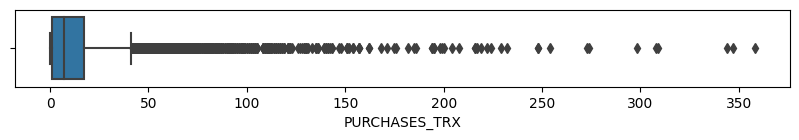

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='PURCHASES_TRX', data= creditcard_df);

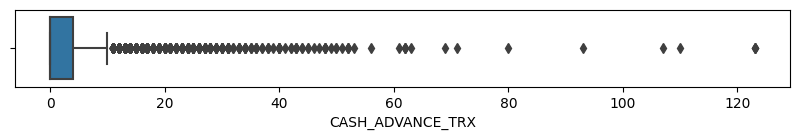

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='CASH_ADVANCE_TRX', data= creditcard_df);

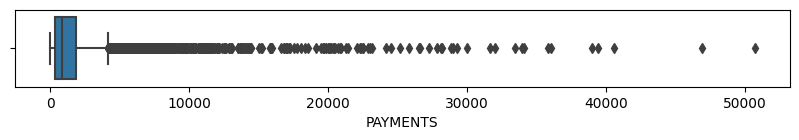

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='PAYMENTS', data= creditcard_df);

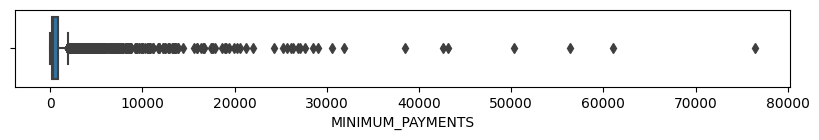

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='MINIMUM_PAYMENTS', data= creditcard_df);

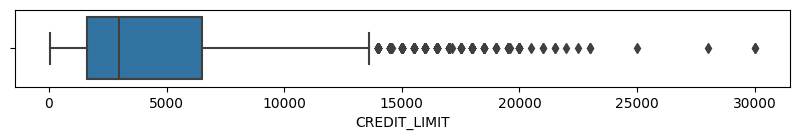

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='CREDIT_LIMIT', data= creditcard_df);

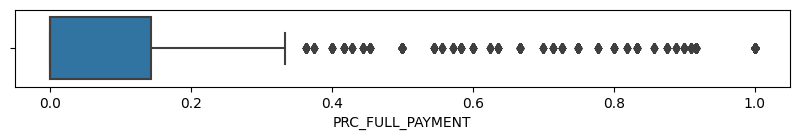

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='PRC_FULL_PAYMENT', data= creditcard_df);

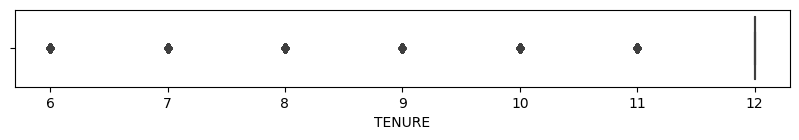

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10,1))
sns.boxplot(x='TENURE', data= creditcard_df);

In [ ]:
s=0
for i in creditcard_df.select_dtypes(include=['float64','int64']).columns:
  max_thresold=creditcard_df[i].quantile(0.95)
  min_thresold=creditcard_df[i].quantile(0.05)
  creditcard_df_no_outlier=creditcard_df[(creditcard_df[i] < max_thresold) & (creditcard_df[i] > min_thresold)].shape
  print(" outlier in ",i,"is" ,int(((creditcard_df.shape[0]-creditcard_df_no_outlier[0])/creditcard_df.shape[0])*100),"%")
  s=s+int(((creditcard_df.shape[0]-creditcard_df_no_outlier[0])/creditcard_df.shape[0])*100)
print('Maximum % outlier in data is',s,"%")

 outlier in  BALANCE is 10 %
 outlier in  BALANCE_FREQUENCY is 75 %
 outlier in  PURCHASES is 27 %
 outlier in  ONEOFF_PURCHASES is 53 %
 outlier in  INSTALLMENTS_PURCHASES is 48 %
 outlier in  CASH_ADVANCE is 56 %
 outlier in  PURCHASES_FREQUENCY is 47 %
 outlier in  ONEOFF_PURCHASES_FREQUENCY is 53 %
 outlier in  PURCHASES_INSTALLMENTS_FREQUENCY is 58 %
 outlier in  CASH_ADVANCE_FREQUENCY is 57 %
 outlier in  CASH_ADVANCE_TRX is 56 %
 outlier in  PURCHASES_TRX is 27 %
 outlier in  CREDIT_LIMIT is 14 %
 outlier in  PAYMENTS is 10 %
 outlier in  MINIMUM_PAYMENTS is 10 %
 outlier in  PRC_FULL_PAYMENT is 71 %
 outlier in  TENURE is 91 %
Maximum % outlier in data is 763 %


In [ ]:
max_thresold_BALANCE=creditcard_df["BALANCE"].quantile(0.95)
min_thresold_BALANCE=creditcard_df["BALANCE"].quantile(0.05)
max_thresold_CREDIT_LIMIT=creditcard_df["CREDIT_LIMIT"].quantile(0.95)
min_thresold_CREDIT_LIMIT=creditcard_df["CREDIT_LIMIT"].quantile(0.05)
max_thresold_PAYMENTS=creditcard_df["PAYMENTS"].quantile(0.95)
min_thresold_PAYMENTS=creditcard_df["PAYMENTS"].quantile(0.05)
max_thresold_MINIMUM_PAYMENTS=creditcard_df["MINIMUM_PAYMENTS"].quantile(0.95)
min_thresold_MINIMUM_PAYMENTS=creditcard_df["MINIMUM_PAYMENTS"].quantile(0.05)
creditcard_df_no_outlier=creditcard_df[(creditcard_df["CREDIT_LIMIT"] < max_thresold_CREDIT_LIMIT) & (creditcard_df["CREDIT_LIMIT"] > min_thresold_CREDIT_LIMIT) & (creditcard_df["BALANCE"] < max_thresold_BALANCE) & (creditcard_df["BALANCE"] > min_thresold_BALANCE) &  (creditcard_df["PAYMENTS"] < max_thresold_PAYMENTS) & (creditcard_df["PAYMENTS"] > min_thresold_PAYMENTS)& (creditcard_df["MINIMUM_PAYMENTS"] < max_thresold_MINIMUM_PAYMENTS) & (creditcard_df["MINIMUM_PAYMENTS"] > min_thresold_MINIMUM_PAYMENTS)]

# max_thresold_BALANCE_FREQUENCY=creditcard_df["BALANCE_FREQUENCY"].quantile(0.95)
# min_thresold_BALANCE_FREQUENCY=creditcard_df["BALANCE_FREQUENCY"].quantile(0.05)
# max_thresold_PURCHASES=creditcard_df["PURCHASES"].quantile(0.95)
# min_thresold_PURCHASES=creditcard_df["PURCHASES"].quantile(0.05)
# max_thresold_ONEOFF_PURCHASES=creditcard_df["ONEOFF_PURCHASES"].quantile(0.95)
# min_thresold_ONEOFF_PURCHASES=creditcard_df["ONEOFF_PURCHASES"].quantile(0.05)
# max_thresold_INSTALLMENTS_PURCHASES=creditcard_df["INSTALLMENTS_PURCHASES"].quantile(0.95)
# min_thresold_INSTALLMENTS_PURCHASES=creditcard_df["INSTALLMENTS_PURCHASES"].quantile(0.05)

# creditcard_df_no_outlier=creditcard_df[(creditcard_df["BALANCE_FREQUENCY"] < max_thresold_BALANCE_FREQUENCY) & (creditcard_df["BALANCE_FREQUENCY"] > min_thresold_BALANCE_FREQUENCY) & (creditcard_df["PURCHASES"] < max_thresold_PURCHASES) & (creditcard_df["PURCHASES"] > min_thresold_PURCHASES) &  (creditcard_df["ONEOFF_PURCHASES"] < max_thresold_ONEOFF_PURCHASES) & (creditcard_df["ONEOFF_PURCHASES"] > min_thresold_ONEOFF_PURCHASES)& (creditcard_df["INSTALLMENTS_PURCHASES"] < max_thresold_INSTALLMENTS_PURCHASES) & (creditcard_df["INSTALLMENTS_PURCHASES"] > min_thresold_INSTALLMENTS_PURCHASES)]
# max_thresold_CASH_ADVANCE =creditcard_df["CASH_ADVANCE"].quantile(0.95)
# min_thresold_CASH_ADVANCE =creditcard_df["CASH_ADVANCE"].quantile(0.05)
# max_thresold_CASH_ADVANCE_FREQUENCY =creditcard_df["CASH_ADVANCE_FREQUENCY"].quantile(0.95)
# min_thresold_CASH_ADVANCE_FREQUENCY =creditcard_df["CASH_ADVANCE_FREQUENCY"].quantile(0.05)
# max_thresold_CASH_ADVANCE_TRX =creditcard_df["CASH_ADVANCE_TRX"].quantile(0.95)
# min_thresold_CASH_ADVANCE_TRX =creditcard_df["CASH_ADVANCE_TRX"].quantile(0.05)
# max_thresold_CASH_ADVANCE_TRX =creditcard_df["CASH_ADVANCE_TRX"].quantile(0.95)
# min_thresold_CASH_ADVANCE_TRX =creditcard_df["CASH_ADVANCE_TRX"].quantile(0.05)
# max_thresold_PURCHASES_TRX =creditcard_df["PURCHASES_TRX"].quantile(0.95)
# min_thresold_PURCHASES_TRX =creditcard_df["PURCHASES_TRX"].quantile(0.05)

# creditcard_df_no_outlier=creditcard_df[(creditcard_df["CASH_ADVANCE"] < max_thresold_CASH_ADVANCE) & (creditcard_df["CASH_ADVANCE"]> min_thresold_CASH_ADVANCE) & (creditcard_df["CASH_ADVANCE_FREQUENCY"] < max_thresold_CASH_ADVANCE_FREQUENCY) & (creditcard_df["CASH_ADVANCE_FREQUENCY"] > min_thresold_CASH_ADVANCE_FREQUENCY) &  (creditcard_df["CASH_ADVANCE_TRX"] < max_thresold_CASH_ADVANCE_TRX) & (creditcard_df["CASH_ADVANCE_TRX"] > min_thresold_CASH_ADVANCE_TRX)& (creditcard_df["PURCHASES_TRX"] < max_thresold_PURCHASES_TRX) & (creditcard_df["PURCHASES_TRX"] > min_thresold_PURCHASES_TRX)]

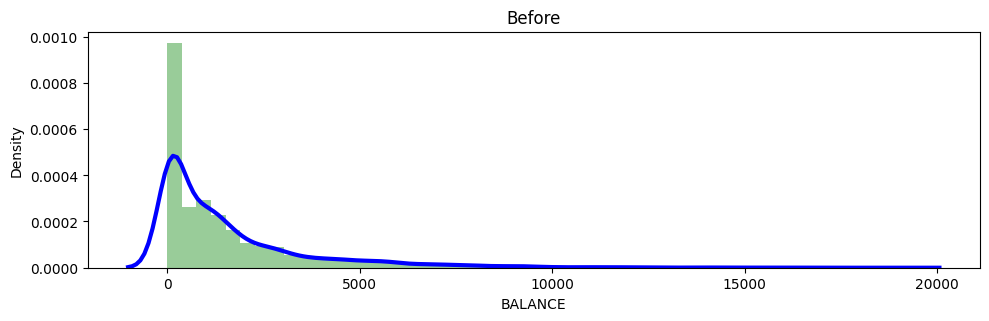

In [ ]:
plt.figure(figsize=(10,50))
plt.subplot(17,1,1)
sns.distplot(creditcard_df[creditcard_df.columns[0]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
plt.title('Before')
plt.tight_layout()
import warnings
warnings.filterwarnings('ignore')

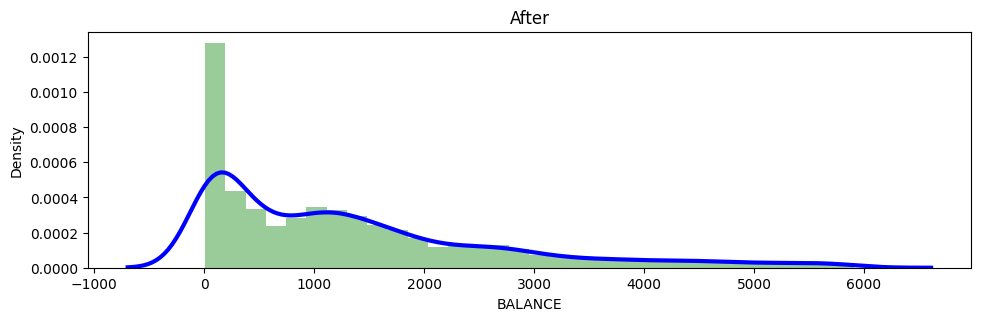

In [ ]:
plt.figure(figsize=(10,50))
plt.subplot(17,1,1)
sns.distplot(creditcard_df_no_outlier[creditcard_df_no_outlier.columns[0]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
plt.title('After')
plt.tight_layout()
import warnings
warnings.filterwarnings('ignore')

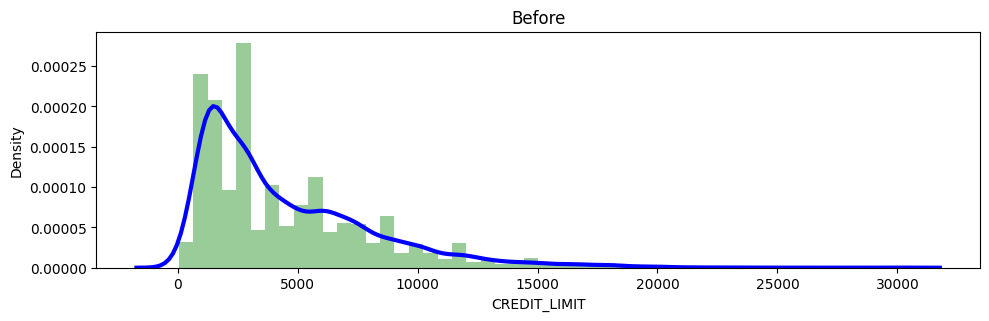

In [ ]:
plt.figure(figsize=(10,50))
plt.subplot(17,1,1)
sns.distplot(creditcard_df[creditcard_df.columns[12]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
plt.title('Before')
plt.tight_layout()
import warnings
warnings.filterwarnings('ignore')

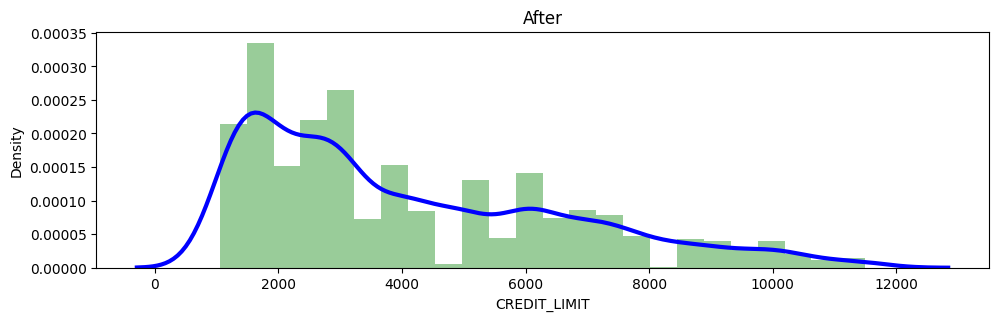

In [ ]:
plt.figure(figsize=(10,50))
plt.subplot(17,1,1)
sns.distplot(creditcard_df_no_outlier[creditcard_df_no_outlier.columns[12]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
plt.title('After')
plt.tight_layout()
import warnings
warnings.filterwarnings('ignore')

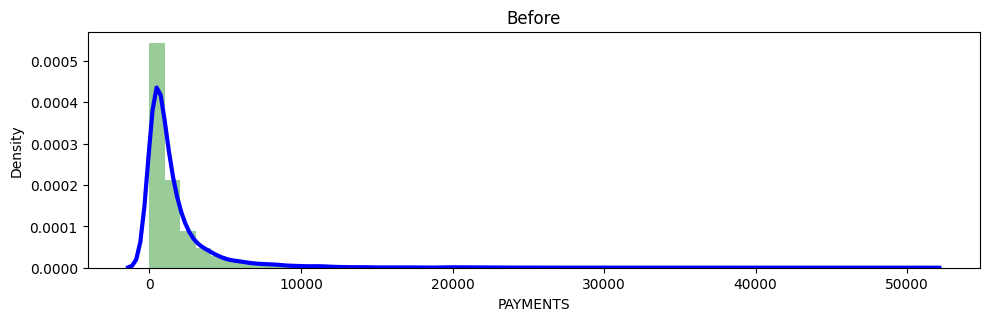

In [ ]:
plt.figure(figsize=(10,50))
plt.subplot(17,1,1)
sns.distplot(creditcard_df[creditcard_df.columns[13]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
plt.title('Before')
plt.tight_layout()
import warnings
warnings.filterwarnings('ignore')

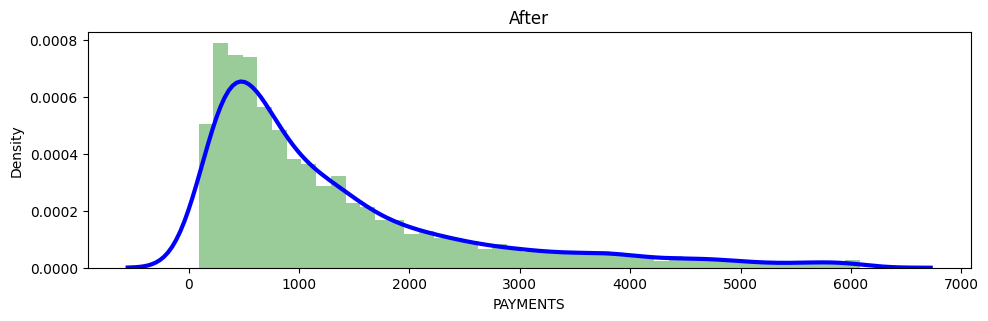

In [ ]:
plt.figure(figsize=(10,50))
plt.subplot(17,1,1)
sns.distplot(creditcard_df_no_outlier[creditcard_df_no_outlier.columns[13]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
plt.title('After')
plt.tight_layout()
import warnings
warnings.filterwarnings('ignore')

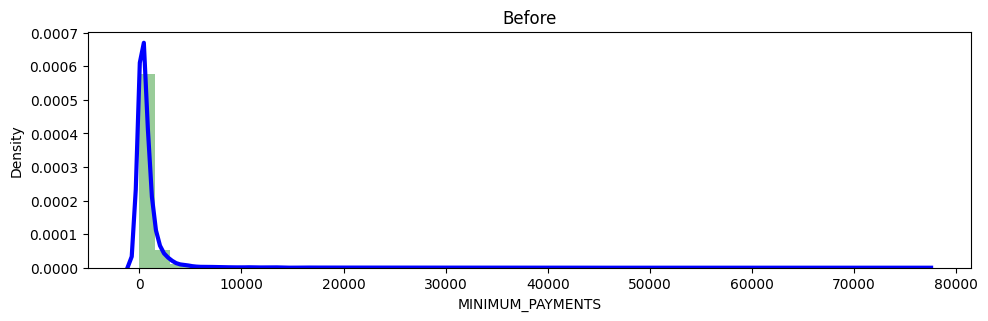

In [ ]:
plt.figure(figsize=(10,50))
plt.subplot(17,1,1)
sns.distplot(creditcard_df[creditcard_df.columns[14]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
plt.title('Before')
plt.tight_layout()
import warnings
warnings.filterwarnings('ignore')

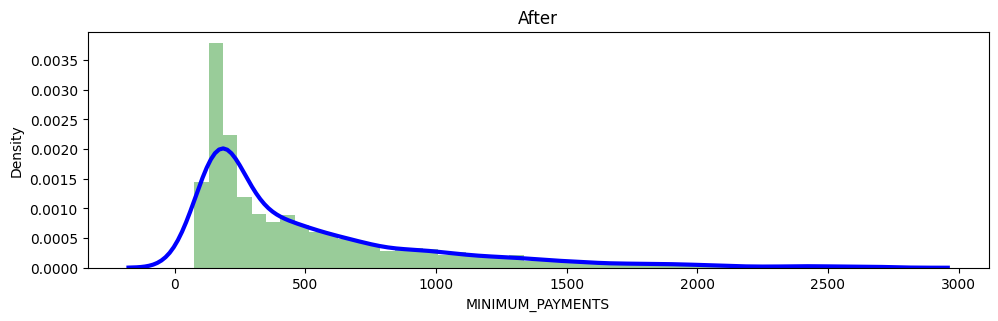

In [ ]:
plt.figure(figsize=(10,50))
plt.subplot(17,1,1)
sns.distplot(creditcard_df_no_outlier[creditcard_df_no_outlier.columns[14]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
plt.title('After')
plt.tight_layout()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
creditcard_df_no_outlier.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.00,0,12,2300.0,679.065082,532.033990,0.000000,12


In [ ]:
data=creditcard_df_no_outlier.copy()

In [ ]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:

    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=500)),Range]=1
    data.loc[((data[c]>500)&(data[c]<=1000)),Range]=2
    data.loc[((data[c]>1000)&(data[c]<=3000)),Range]=3
    data.loc[((data[c]>3000)&(data[c]<=5000)),Range]=4
    data.loc[((data[c]>5000)&(data[c]<=10000)),Range]=5
    data.loc[((data[c]>10000)),Range]=6

In [ ]:
columns=['PURCHASES_TRX', 'CASH_ADVANCE_TRX']

for c in columns:

    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=5)),Range]=1
    data.loc[((data[c]>5)&(data[c]<=10)),Range]=2
    data.loc[((data[c]>10)&(data[c]<=15)),Range]=3
    data.loc[((data[c]>15)&(data[c]<=20)),Range]=4
    data.loc[((data[c]>20)&(data[c]<=30)),Range]=5
    data.loc[((data[c]>30)&(data[c]<=50)),Range]=6
    data.loc[((data[c]>50)&(data[c]<=100)),Range]=7
    data.loc[((data[c]>100)),Range]=8

In [ ]:
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

# for c in columns:

#     Range=c+'_RANGE'
#     data[Range]=0
#     data.loc[((data[c]>0)&(data[c]<=0.1)),Range]=1
#     data.loc[((data[c]>0.1)&(data[c]<=0.2)),Range]=2
#     data.loc[((data[c]>0.2)&(data[c]<=0.3)),Range]=3
#     data.loc[((data[c]>0.3)&(data[c]<=0.4)),Range]=4
#     data.loc[((data[c]>0.4)&(data[c]<=0.5)),Range]=5
#     data.loc[((data[c]>0.5)&(data[c]<=0.6)),Range]=6
#     data.loc[((data[c]>0.6)&(data[c]<=0.7)),Range]=7
#     data.loc[((data[c]>0.7)&(data[c]<=0.8)),Range]=8
#     data.loc[((data[c]>0.8)&(data[c]<=0.9)),Range]=9
#     data.loc[((data[c]>0.9)&(data[c]<=1.0)),Range]=10

for c in columns:

    Range=c+'_RANGE'
    data[Range]=0
    data.loc[((data[c]>0)&(data[c]<=0.2)),Range]=1
    data.loc[((data[c]>0.2)&(data[c]<=0.4)),Range]=2
    data.loc[((data[c]>0.4)&(data[c]<=0.6)),Range]=3
    data.loc[((data[c]>0.6)&(data[c]<=0.8)),Range]=4
    data.loc[((data[c]>0.8)&(data[c]<=1.0)),Range]=5
    # data.loc[((data[c]>0.5)&(data[c]<=0.6)),Range]=6
    # data.loc[((data[c]>0.6)&(data[c]<=0.7)),Range]=7
    # data.loc[((data[c]>0.7)&(data[c]<=0.8)),Range]=8
    # data.loc[((data[c]>0.8)&(data[c]<=0.9)),Range]=9
    # data.loc[((data[c]>0.9)&(data[c]<=1.0)),Range]=10

In [ ]:
data.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)
data.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE
1,12,4,0,0,0,5,5,4,3,0,1,5,0,0,0,2,2
2,12,3,2,2,0,0,5,2,2,3,0,5,5,5,0,0,0
4,12,2,1,1,0,0,3,2,1,1,0,5,1,1,0,0,0
5,12,3,3,0,3,0,3,3,3,2,0,5,4,0,3,0,0
7,12,3,1,0,1,0,3,2,2,3,0,5,5,0,5,0,0


In [ ]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
labels = ['<500','500:1000','1000:3000','3000:5000','5000:10000','>10000']
fig = go.Figure(data=[go.Pie(labels=labels, values=data.BALANCE_RANGE.value_counts(sort=False),hole = .3)])
fig.layout.update(title='BALANCE')
iplot(fig)

In [ ]:
fig = go.Figure(data=[go.Pie(labels=labels, values=data.PURCHASES_RANGE.value_counts(sort=False),hole = .3)])
fig.layout.update(title='PURCHASES')
iplot(fig)


In [ ]:
fig = go.Figure(data=[go.Pie(labels=labels, values=data.ONEOFF_PURCHASES_RANGE.value_counts(sort=False),hole = .3)])
fig.layout.update(title='ONEOFF_PURCHASES')
iplot(fig)

In [ ]:
fig = go.Figure(data=[go.Pie(labels=labels, values=data.INSTALLMENTS_PURCHASES_RANGE.value_counts(sort=False),hole = .3)])
fig.layout.update(title='INSTALLMENTS_PURCHASES')
iplot(fig)

In [ ]:
fig = go.Figure(data=[go.Pie(labels=labels, values=data.CASH_ADVANCE_RANGE.value_counts(sort=False),hole = .3)])
fig.layout.update(title='CASH_ADVANCE')
iplot(fig)


In [ ]:
fig = go.Figure(data=[go.Pie(labels=labels, values=data.CREDIT_LIMIT_RANGE.value_counts(sort=False),hole = .3)])
fig.layout.update(title='CREDIT_LIMIT')
iplot(fig)

In [ ]:
fig = go.Figure(data=[go.Pie(labels=labels, values=data.PAYMENTS_RANGE.value_counts(sort=False),hole = .3)])
fig.layout.update(title='PAYMENTS')
iplot(fig)

In [ ]:
MINIMUM_PAYMENTS_values=[data.MINIMUM_PAYMENTS_RANGE[data['MINIMUM_PAYMENTS_RANGE']==1].count(),data.MINIMUM_PAYMENTS_RANGE[data['MINIMUM_PAYMENTS_RANGE']==2].count(),data.MINIMUM_PAYMENTS_RANGE[data['MINIMUM_PAYMENTS_RANGE']==3].count(),data.MINIMUM_PAYMENTS_RANGE[data['MINIMUM_PAYMENTS_RANGE']==4].count(),data.MINIMUM_PAYMENTS_RANGE[data['MINIMUM_PAYMENTS_RANGE']==5].count(),data.MINIMUM_PAYMENTS_RANGE[data['MINIMUM_PAYMENTS_RANGE']==6].count()]
MINIMUM_PAYMENTS_labels = ['<500','500:1000','1000:3000','3000:5000']
fig = go.Figure(data=[go.Pie(labels=MINIMUM_PAYMENTS_labels, values=MINIMUM_PAYMENTS_values,hole = .3)])
fig.layout.update(title='MINIMUM_PAYMENTS')
iplot(fig)

In [ ]:
# labels =['0:0.1','0.1:0.2','0.2:0.3','0.3:0.4','0.4:0.5','0.5:0.6','0.6:0.7','0.7:0.8','0.8:0.9','0.9:1']
labels =['0.1:0.2','0.2:0.4','0.4:0.6','0.6:0.8','0.8:1.0']
columns=['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

values = [data.BALANCE_FREQUENCY_RANGE[data['BALANCE_FREQUENCY_RANGE']==1].count(),data.BALANCE_FREQUENCY_RANGE[data['BALANCE_FREQUENCY_RANGE']==2].count(),data.BALANCE_FREQUENCY_RANGE[data['BALANCE_FREQUENCY_RANGE']==3].count(),data.BALANCE_FREQUENCY_RANGE[data['BALANCE_FREQUENCY_RANGE']==4].count(),data.BALANCE_FREQUENCY_RANGE[data['BALANCE_FREQUENCY_RANGE']==5].count(),data.BALANCE_FREQUENCY_RANGE[data['BALANCE_FREQUENCY_RANGE']==6].count(),data.BALANCE_FREQUENCY_RANGE[data['BALANCE_FREQUENCY_RANGE']==7].count(),data.BALANCE_FREQUENCY_RANGE[data['BALANCE_FREQUENCY_RANGE']==8].count(),data.BALANCE_FREQUENCY_RANGE[data['BALANCE_FREQUENCY_RANGE']==9].count(),data.BALANCE_FREQUENCY_RANGE[data['BALANCE_FREQUENCY_RANGE']==10].count()]
fig = go.Figure([go.Bar(x=labels, y=values)])
fig.update_yaxes(tickfont_size=24)
fig.update_xaxes(tickfont_size=24)
fig.update_layout(
    title={
        'text': 'BALANCE_FREQUENCY',
        'font': {'size': 24}
    }
)
iplot(fig)

In [ ]:
values = [data.PURCHASES_FREQUENCY_RANGE[data['PURCHASES_FREQUENCY_RANGE']==1].count(),data.PURCHASES_FREQUENCY_RANGE[data['PURCHASES_FREQUENCY_RANGE']==2].count(),data.PURCHASES_FREQUENCY_RANGE[data['PURCHASES_FREQUENCY_RANGE']==3].count(),data.PURCHASES_FREQUENCY_RANGE[data['PURCHASES_FREQUENCY_RANGE']==4].count(),data.PURCHASES_FREQUENCY_RANGE[data['PURCHASES_FREQUENCY_RANGE']==5].count(),data.PURCHASES_FREQUENCY_RANGE[data['PURCHASES_FREQUENCY_RANGE']==6].count(),data.PURCHASES_FREQUENCY_RANGE[data['PURCHASES_FREQUENCY_RANGE']==7].count(),data.PURCHASES_FREQUENCY_RANGE[data['PURCHASES_FREQUENCY_RANGE']==8].count(),data.PURCHASES_FREQUENCY_RANGE[data['PURCHASES_FREQUENCY_RANGE']==9].count(),data.PURCHASES_FREQUENCY_RANGE[data['PURCHASES_FREQUENCY_RANGE']==10].count()]
fig = go.Figure([go.Bar(x=labels, y=values)])
fig.update_yaxes(tickfont_size=24)
fig.update_xaxes(tickfont_size=24)
fig.update_layout(
    title={
        'text': 'PURCHASES_FREQUENCY_RANGE',
        'font': {'size': 24}
    }
)
iplot(fig)

In [ ]:
values = [data.ONEOFF_PURCHASES_FREQUENCY_RANGE[data['ONEOFF_PURCHASES_FREQUENCY_RANGE']==1].count(),data.ONEOFF_PURCHASES_FREQUENCY_RANGE[data['ONEOFF_PURCHASES_FREQUENCY_RANGE']==2].count(),data.ONEOFF_PURCHASES_FREQUENCY_RANGE[data['ONEOFF_PURCHASES_FREQUENCY_RANGE']==3].count(),data.ONEOFF_PURCHASES_FREQUENCY_RANGE[data['ONEOFF_PURCHASES_FREQUENCY_RANGE']==4].count(),data.ONEOFF_PURCHASES_FREQUENCY_RANGE[data['ONEOFF_PURCHASES_FREQUENCY_RANGE']==5].count(),data.ONEOFF_PURCHASES_FREQUENCY_RANGE[data['ONEOFF_PURCHASES_FREQUENCY_RANGE']==6].count(),data.ONEOFF_PURCHASES_FREQUENCY_RANGE[data['ONEOFF_PURCHASES_FREQUENCY_RANGE']==7].count(),data.ONEOFF_PURCHASES_FREQUENCY_RANGE[data['ONEOFF_PURCHASES_FREQUENCY_RANGE']==8].count(),data.ONEOFF_PURCHASES_FREQUENCY_RANGE[data['ONEOFF_PURCHASES_FREQUENCY_RANGE']==9].count(),data.ONEOFF_PURCHASES_FREQUENCY_RANGE[data['ONEOFF_PURCHASES_FREQUENCY_RANGE']==10].count()]
fig = go.Figure([go.Bar(x=labels, y=values)])
fig.update_yaxes(tickfont_size=24)
fig.update_xaxes(tickfont_size=24)
fig.update_layout(
    title={
        'text': 'ONEOFF_PURCHASES_FREQUENCY_RANGE',
        'font': {'size': 24}
    }
)
iplot(fig)

In [ ]:
values = [data.PURCHASES_INSTALLMENTS_FREQUENCY_RANGE[data['PURCHASES_INSTALLMENTS_FREQUENCY_RANGE']==1].count(),data.PURCHASES_INSTALLMENTS_FREQUENCY_RANGE[data['PURCHASES_INSTALLMENTS_FREQUENCY_RANGE']==2].count(),data.PURCHASES_INSTALLMENTS_FREQUENCY_RANGE[data['PURCHASES_INSTALLMENTS_FREQUENCY_RANGE']==3].count(),data.PURCHASES_INSTALLMENTS_FREQUENCY_RANGE[data['PURCHASES_INSTALLMENTS_FREQUENCY_RANGE']==4].count(),data.PURCHASES_INSTALLMENTS_FREQUENCY_RANGE[data['PURCHASES_INSTALLMENTS_FREQUENCY_RANGE']==5].count(),data.PURCHASES_INSTALLMENTS_FREQUENCY_RANGE[data['PURCHASES_INSTALLMENTS_FREQUENCY_RANGE']==6].count(),data.PURCHASES_INSTALLMENTS_FREQUENCY_RANGE[data['PURCHASES_INSTALLMENTS_FREQUENCY_RANGE']==7].count(),data.PURCHASES_INSTALLMENTS_FREQUENCY_RANGE[data['PURCHASES_INSTALLMENTS_FREQUENCY_RANGE']==8].count(),data.PURCHASES_INSTALLMENTS_FREQUENCY_RANGE[data['PURCHASES_INSTALLMENTS_FREQUENCY_RANGE']==9].count(),data.PURCHASES_INSTALLMENTS_FREQUENCY_RANGE[data['PURCHASES_INSTALLMENTS_FREQUENCY_RANGE']==10].count()]
fig = go.Figure([go.Bar(x=labels, y=values)])
fig.update_yaxes(tickfont_size=24)
fig.update_xaxes(tickfont_size=24)
fig.update_layout(
    title={
        'text': 'PURCHASES_INSTALLMENTS_FREQUENCY_RANGE',
        'font': {'size': 24}
    }
)
iplot(fig)

In [ ]:
values = [data.CASH_ADVANCE_FREQUENCY_RANGE[data['CASH_ADVANCE_FREQUENCY_RANGE']==1].count(),data.CASH_ADVANCE_FREQUENCY_RANGE[data['CASH_ADVANCE_FREQUENCY_RANGE']==2].count(),data.CASH_ADVANCE_FREQUENCY_RANGE[data['CASH_ADVANCE_FREQUENCY_RANGE']==3].count(),data.CASH_ADVANCE_FREQUENCY_RANGE[data['CASH_ADVANCE_FREQUENCY_RANGE']==4].count(),data.CASH_ADVANCE_FREQUENCY_RANGE[data['CASH_ADVANCE_FREQUENCY_RANGE']==5].count(),data.CASH_ADVANCE_FREQUENCY_RANGE[data['CASH_ADVANCE_FREQUENCY_RANGE']==6].count(),data.CASH_ADVANCE_FREQUENCY_RANGE[data['CASH_ADVANCE_FREQUENCY_RANGE']==7].count(),data.CASH_ADVANCE_FREQUENCY_RANGE[data['CASH_ADVANCE_FREQUENCY_RANGE']==8].count(),data.CASH_ADVANCE_FREQUENCY_RANGE[data['CASH_ADVANCE_FREQUENCY_RANGE']==9].count(),data.CASH_ADVANCE_FREQUENCY_RANGE[data['CASH_ADVANCE_FREQUENCY_RANGE']==10].count()]
fig = go.Figure([go.Bar(x=labels, y=values)])
fig.update_yaxes(tickfont_size=24)
fig.update_xaxes(tickfont_size=24)
fig.update_layout(
    title={
        'text': 'CASH_ADVANCE_FREQUENCY_RANGE',
        'font': {'size': 24}
    }
)
iplot(fig)


In [ ]:
values = [data.PRC_FULL_PAYMENT_RANGE[data['PRC_FULL_PAYMENT_RANGE']==1].count(),data.PRC_FULL_PAYMENT_RANGE[data['PRC_FULL_PAYMENT_RANGE']==2].count(),data.PRC_FULL_PAYMENT_RANGE[data['PRC_FULL_PAYMENT_RANGE']==3].count(),data.PRC_FULL_PAYMENT_RANGE[data['PRC_FULL_PAYMENT_RANGE']==4].count(),data.PRC_FULL_PAYMENT_RANGE[data['PRC_FULL_PAYMENT_RANGE']==5].count(),data.PRC_FULL_PAYMENT_RANGE[data['PRC_FULL_PAYMENT_RANGE']==6].count(),data.PRC_FULL_PAYMENT_RANGE[data['PRC_FULL_PAYMENT_RANGE']==7].count(),data.PRC_FULL_PAYMENT_RANGE[data['PRC_FULL_PAYMENT_RANGE']==8].count(),data.PRC_FULL_PAYMENT_RANGE[data['PRC_FULL_PAYMENT_RANGE']==9].count(),data.PRC_FULL_PAYMENT_RANGE[data['PRC_FULL_PAYMENT_RANGE']==10].count()]
fig = go.Figure([go.Bar(x=labels, y=values)])
fig.update_yaxes(tickfont_size=24)
fig.update_xaxes(tickfont_size=24)
fig.update_layout(
    title={
        'text': 'PRC_FULL_PAYMENT_RANGE',
        'font': {'size': 24}
    }
)
iplot(fig)

<Axes: >

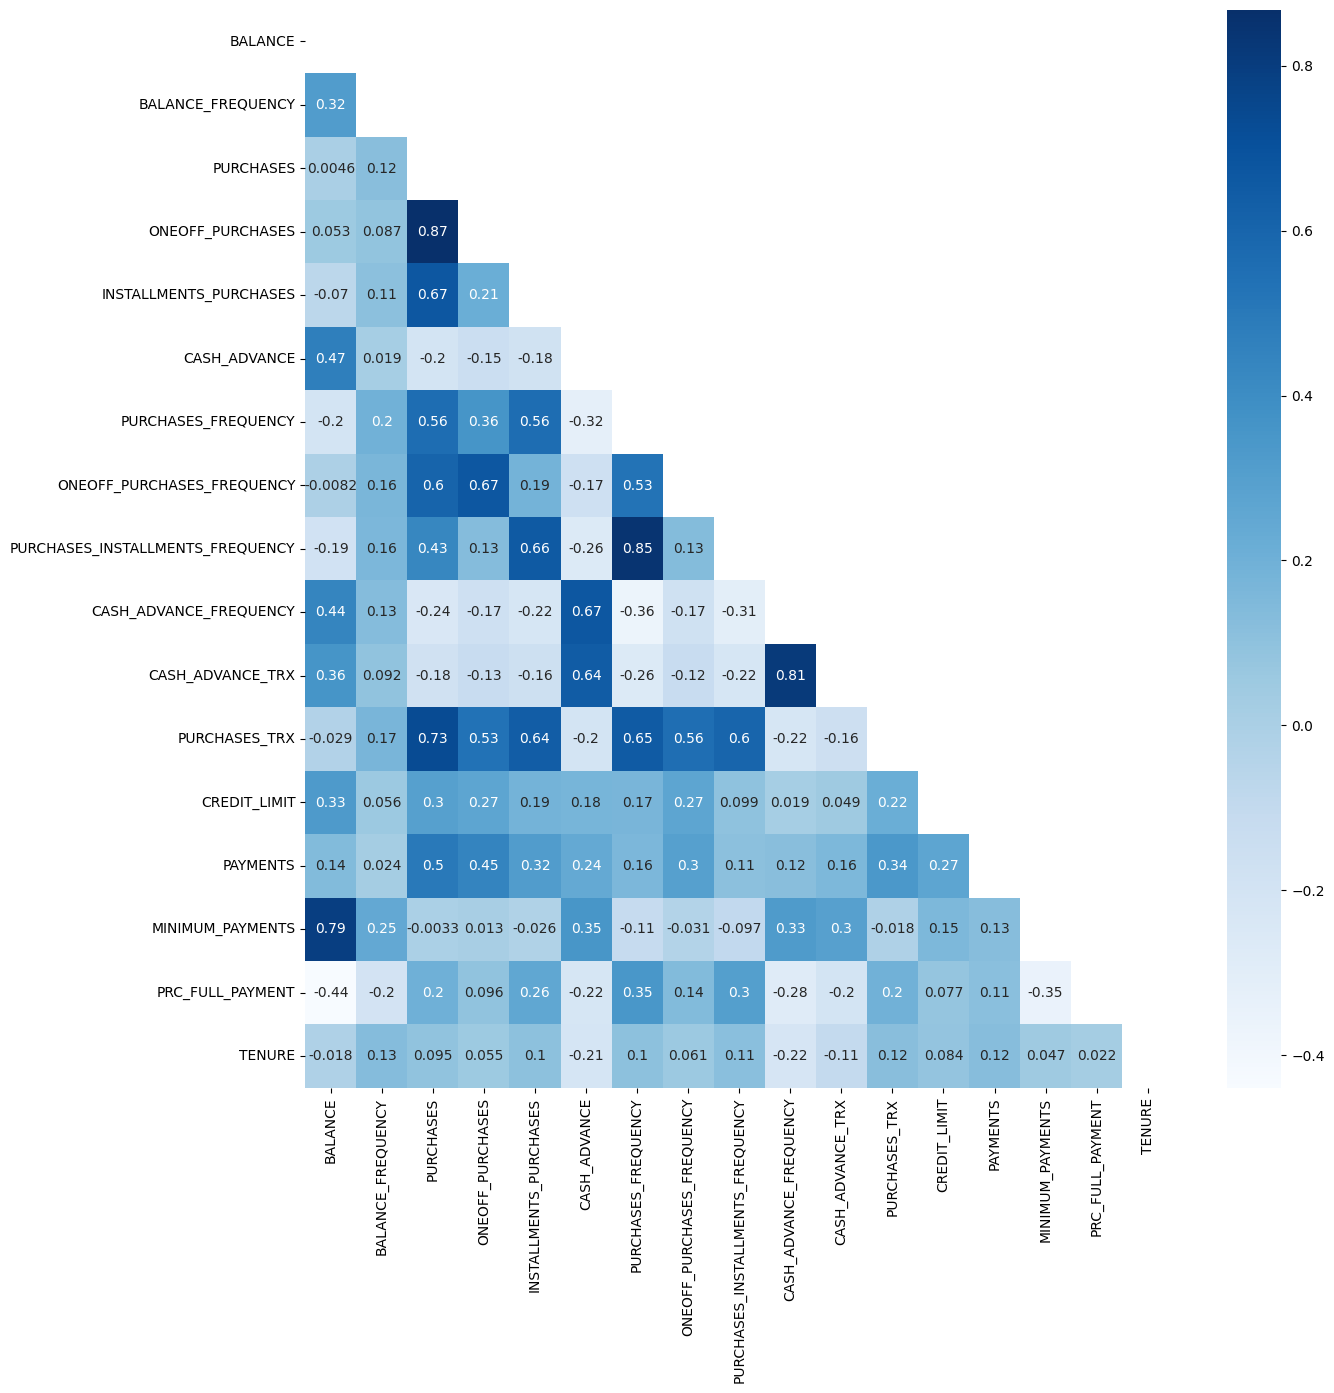

In [ ]:
plt.figure(figsize=(14,14))
mask = np.triu(np.ones_like(creditcard_df_no_outlier.corr(), dtype=bool))
sns.heatmap( creditcard_df_no_outlier.corr(), annot=True, cmap='Blues', mask=mask)

In [ ]:
scalar=StandardScaler()
creditcard_scaled_df=scalar.fit_transform(creditcard_df_no_outlier)

In [ ]:
pca= PCA(n_components=2)
principal_comp=pca.fit_transform(creditcard_scaled_df)
pca_df=pd.DataFrame(data=principal_comp,columns=["pca1","pca2"])
pca_df.head()

,pca1,pca2
0,-2.561360,2.947822
1,1.036903,0.682788
2,-1.323739,-1.681404
3,0.359321,0.958536
4,0.666278,-0.848148


In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
def train_GaussianMixture(k,X):
  GaussianMixture_model = GaussianMixture(n_components=k)
  y_pred = GaussianMixture_model.fit_predict(X)
  print("Gaussian Mixture Model: clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )
  return silhouette_score(X,y_pred)

In [ ]:
def train_GaussianMixtures(k,X):
  GaussianMixture_model = GaussianMixture(n_components=k)
  y_pred = GaussianMixture_model.fit_predict(X)
  print("GaussianMixture Model:clusters : ",k ," davies_bouldin_score: ",davies_bouldin_score(X,y_pred) )
  return davies_bouldin_score(X,y_pred)

In [ ]:
def train_GaussianMixturess(k,X):
  GaussianMixture_model = GaussianMixture(n_components=k)
  y_pred = GaussianMixture_model.fit_predict(X)
  print("GaussianMixture Model based Clustering : clusters : ",k ," calinski_harabasz_score : ",calinski_harabasz_score(X,y_pred) )
  return calinski_harabasz_score (X,y_pred)

In [ ]:
gmm_score=[]
clusters=[3,4,5,6]
for i in clusters:
 x=train_GaussianMixture(i,creditcard_scaled_df)
 gmm_score.append(x)

Gaussian Mixture Model: clusters :  3  silhouette_score :  0.11726929587644012
Gaussian Mixture Model: clusters :  4  silhouette_score :  0.09355738922421428
Gaussian Mixture Model: clusters :  5  silhouette_score :  0.07681087107862755
Gaussian Mixture Model: clusters :  6  silhouette_score :  0.015717520874695776


In [ ]:
gmm_scorec=[]
clusters=[3,4,5,6]
for i in clusters:
  y=train_GaussianMixtures(i,creditcard_scaled_df)
  gmm_scorec.append(y)

GaussianMixture Model:clusters :  3  davies_bouldin_score:  2.691494411624769
GaussianMixture Model:clusters :  4  davies_bouldin_score:  2.834600798178984
GaussianMixture Model:clusters :  5  davies_bouldin_score:  3.0087092430229583
GaussianMixture Model:clusters :  6  davies_bouldin_score:  2.59311578697585


In [ ]:
! pip install fuzzy-c-means


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fcmeans import FCM
# GaussianMixture Model based clustering
def train_FuzzyCMean(k,X):
  FuzzyCMean_model = FCM(n_clusters=k)
  FuzzyCMean_model.fit(X)
  y_pred =FuzzyCMean_model.predict(X)
  print(" FuzzyCMean : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )
  return silhouette_score(X,y_pred)

In [ ]:
def train_FuzzyCMeans(k,X):
  FuzzyCMean_model = FCM(n_clusters=k)
  FuzzyCMean_model.fit(X)
  y_pred =FuzzyCMean_model.predict(X)
  print(" FuzzyCMean based Clustering : clusters : ",k ," davies_bouldin_score : ",davies_bouldin_score(X,y_pred) )
  return davies_bouldin_score(X,y_pred)

In [ ]:
fcm_score=[]
clusters=[3,4,5,6]
for i in clusters:
  x=train_FuzzyCMean(i,creditcard_scaled_df)
  fcm_score.append(x)

 FuzzyCMean : clusters :  3  silhouette_score :  0.09595645688930464
 FuzzyCMean : clusters :  4  silhouette_score :  0.04718959835923457
 FuzzyCMean : clusters :  5  silhouette_score :  0.02956159365464617
 FuzzyCMean : clusters :  6  silhouette_score :  0.04189548065470431


In [ ]:
def train_spectral(k,X):
  spectral_model = SpectralClustering(n_clusters=k)
  y_pred = spectral_model.fit_predict(X)
  print("Spectral Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )

In [ ]:
clusters=[3,4,5,6]
for i in clusters:
  train_spectral(i,creditcard_scaled_df)

Spectral Clustering : clusters :  3  silhouette_score :  0.6234853368440715
Spectral Clustering : clusters :  4  silhouette_score :  0.28893121662110083
Spectral Clustering : clusters :  5  silhouette_score :  0.276474853809501
Spectral Clustering : clusters :  6  silhouette_score :  0.2724101949554238


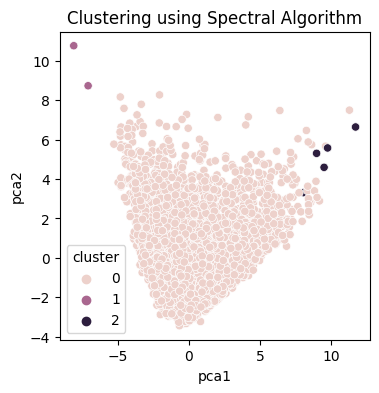

In [ ]:
spectral_model = SpectralClustering(n_clusters=3)
y_pred = spectral_model.fit_predict(creditcard_scaled_df)
pca_df_spl= pd.concat([pca_df,pd.DataFrame({'cluster':spectral_model.labels_})],axis=1)
plt.figure(figsize=(4,4))
# fig,ax = plt.subplots(nrows=2,ncols=2, figsize=(20,20))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_spl)
plt.title("Clustering using Spectral Algorithm")
plt.show()

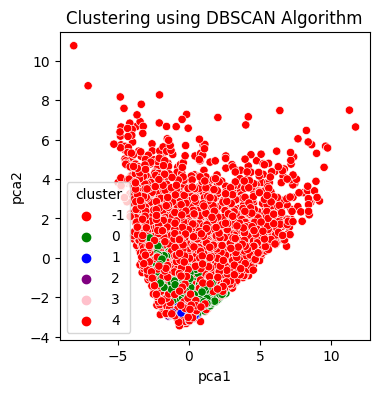

In [ ]:
model_dbscan = DBSCAN(eps=1, min_samples=18)
y_pred = model_dbscan.fit_predict(creditcard_scaled_df)
pca_df_dbscan= pd.concat([pca_df,pd.DataFrame({'cluster':model_dbscan.labels_})],axis=1)
plt.figure(figsize=(4,4))
ax1=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_dbscan,palette=['red','green','blue','purple','pink'])
plt.title("Clustering using DBSCAN Algorithm")
plt.show()

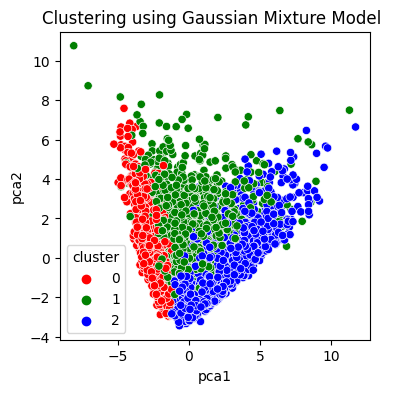

In [ ]:
GaussianMixture_model = GaussianMixture(n_components=3)
y_pred = GaussianMixture_model.fit_predict(creditcard_scaled_df)
pca_df_gmm= pd.concat([pca_df,pd.DataFrame({'cluster':y_pred})],axis=1)
# fig,ax = plt.subplots(nrows=2,ncols=2, figsize=(10,10))
plt.figure(figsize=(4,4))
ax=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_gmm,palette=['red','green','blue'])
# sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_gmm,palette=['red','green','blue'], ax=ax[0,0])
# ax[1, 0].set_title("Clustering using Gaussian Mixture Model ")
plt.title("Clustering using Gaussian Mixture Model ")
plt.show()

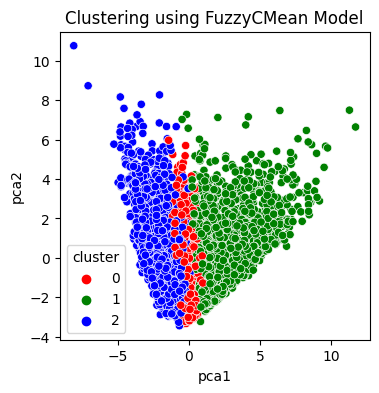

In [ ]:
FuzzyCMean_model = FCM(n_clusters=3)
FuzzyCMean_model.fit(creditcard_scaled_df)
y_pred =FuzzyCMean_model.predict(creditcard_scaled_df)
pca_df_cmm= pd.concat([pca_df,pd.DataFrame({'cluster':y_pred})],axis=1)
# fig,ax = plt.subplots(nrows=2,ncols=2, figsize=(10,10))
plt.figure(figsize=(4,4))
ax3=sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_cmm,palette=['red','green','blue'])
# sns.scatterplot(x="pca1",y="pca2",hue="cluster",data=pca_df_cmm,palette=['red','green','blue'], ax=ax[0,0])
# ax[0, 0].set_title("Clustering using FuzzyCMean Model")
plt.title("Clustering using FuzzyCMean Model")
plt.show()

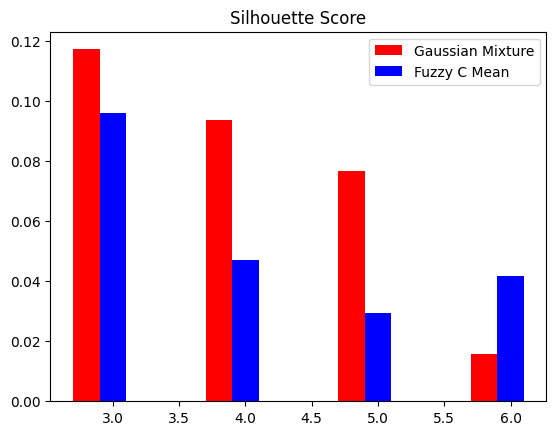

In [ ]:
cluster = np.array([3, 4, 5, 6])
gmm_score=np.array(gmm_score)
fcm_score=np.array(fcm_score)
c=0.2
plt.bar(cluster-0.2,gmm_score,color='red',width=0.2,label='Gaussian Mixture')
plt.bar(cluster,fcm_score,color='blue',width=0.2,label='Fuzzy C Mean')
plt.legend(["Gaussian Mixture","Fuzzy C Mean"])
plt.title("Silhouette Score")
plt.show()


In [ ]:
fcm_scorec=[]
clusters=[3,4,5,6]
for i in clusters:
  y=train_FuzzyCMeans(i,creditcard_scaled_df)
  fcm_scorec.append(y)

 FuzzyCMean based Clustering : clusters :  3  davies_bouldin_score :  2.7776827752733575
 FuzzyCMean based Clustering : clusters :  4  davies_bouldin_score :  3.961133888915258
 FuzzyCMean based Clustering : clusters :  5  davies_bouldin_score :  3.068720316314684
 FuzzyCMean based Clustering : clusters :  6  davies_bouldin_score :  3.545368366960622


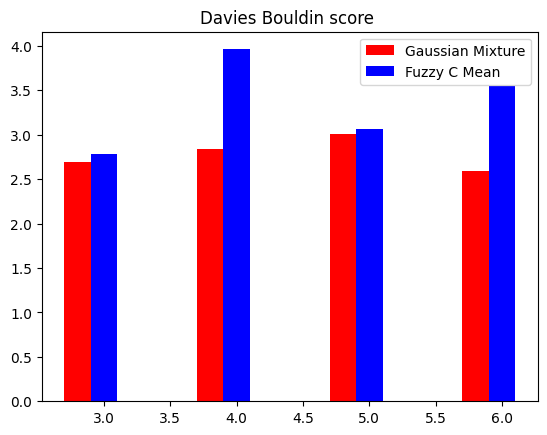

In [ ]:
cluster = np.array([3, 4, 5, 6])
gmm_scorec=np.array(gmm_scorec)
fcm_scorec=np.array(fcm_scorec)
c=0.2
plt.bar(cluster-0.2,gmm_scorec,color='red',width=0.2,label='Gaussian Mixture')
plt.bar(cluster,fcm_scorec,color='blue',width=0.2,label='Fuzzy C Mean')
plt.legend(["Gaussian Mixture","Fuzzy C Mean"])
plt.title("Davies Bouldin score ")
plt.show()

In [ ]:
from fcmeans import FCM
# GaussianMixture Model based clustering
def  DBSCAN(k,X):
  FuzzyCMean_model = FCM(n_clusters=k)
  FuzzyCMean_model.fit(X)
  y_pred =FuzzyCMean_model.predict(X)
  print(" FuzzyCMean based Clustering : clusters : ",k ," silhouette_score : ",silhouette_score(X,y_pred) )
  return silhouette_score(X,y_pred)

In [ ]:
gm = GaussianMixture(n_components=3)
gm.fit(creditcard_scaled_df)
gm_labels = gm.predict(creditcard_scaled_df)


In [ ]:
creditcard_df_no_outlier['Cluster'] = gm_labels


In [ ]:
creditcard_df_no_outlier

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8902,34.048983,1.000000,181.62,0.00,181.62,0.000000,0.857143,0.000000,0.714286,0.000000,0,6,1500.0,135.187785,101.820343,0.600000,7,0
8914,181.891981,0.500000,0.00,0.00,0.00,1865.191764,0.000000,0.000000,0.000000,0.500000,10,0,2000.0,4565.356495,88.057892,1.000000,6,1
8917,1880.817982,1.000000,0.00,0.00,0.00,2335.949930,0.000000,0.000000,0.000000,0.333333,5,0,2500.0,221.568190,374.197621,0.000000,6,2
8923,486.661842,0.833333,1898.88,939.09,959.79,0.000000,0.833333,0.666667,0.666667,0.000000,0,24,1200.0,669.039640,336.880119,0.500000,6,0


In [ ]:
def spider_plot(data, title):
    means = data.groupby("Cluster").mean().to_numpy()
    names = data.columns[0:-1]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(names))
    categories = np.arange(0, len(means))
    plt.figure(figsize=(10,10))
    plt.subplot(polar=True)
    for i in range(len(means)):
        plt.plot(label_loc, means[i], label=f'class {categories[i]}')
    plt.title(f'Feature comparison ({title})', size=20)
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=names)
    plt.legend()
    plt.show()

In [ ]:
def colorful_scatter(data):
    LABEL_COLOR_MAP = {0 : 'y',
                       1 : 'g',
                       2 : 'm',
                       3 : 'k'
                       }
    sns.jointplot(data=data, x="BALANCE", y="PURCHASES", hue="Cluster", palette=LABEL_COLOR_MAP, alpha=0.6, height=10)

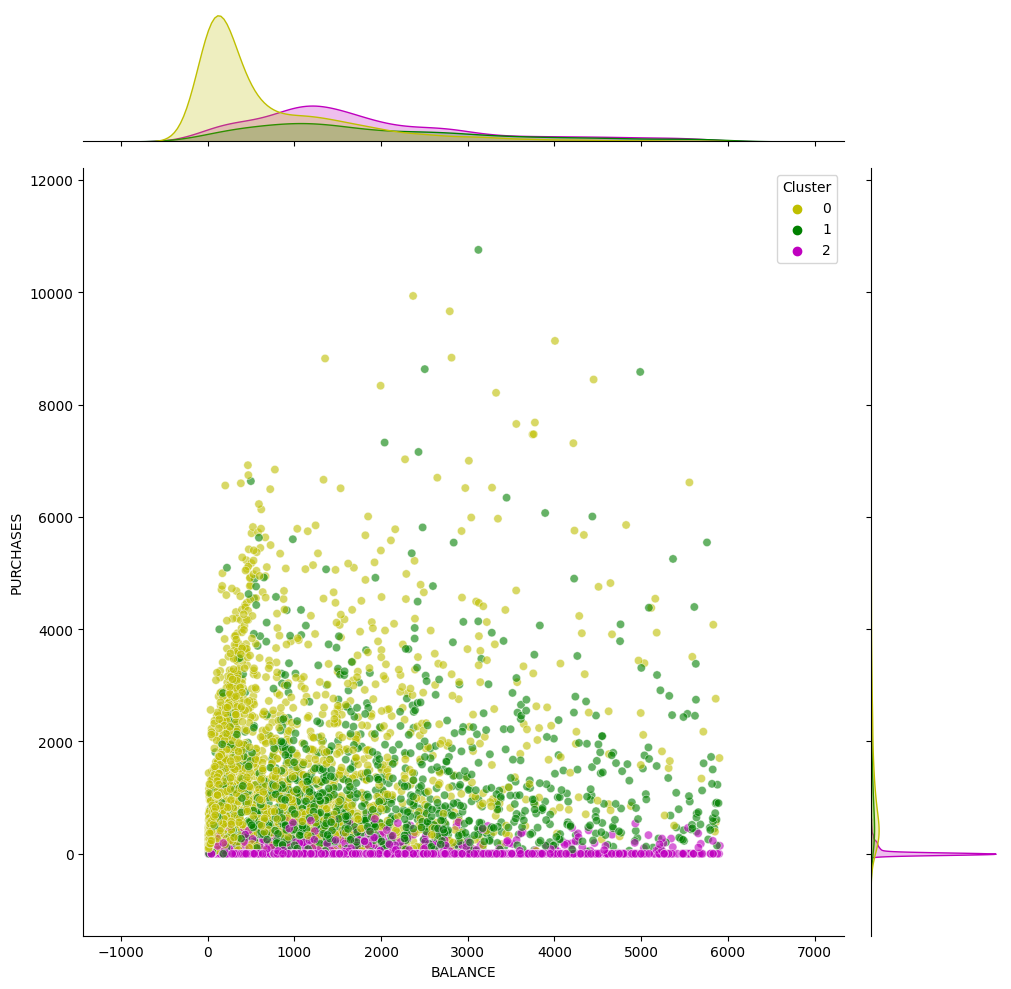

In [ ]:
colorful_scatter(creditcard_df_no_outlier)

In [ ]:
def kde_plot(data,x):
    LABEL_COLOR_MAP = {0 : 'y',
                   1 : 'g',
                   2 : 'm',
                   3 : 'k'
                   }
    sns.kdeplot(data=data, x=x, hue="Cluster", palette=LABEL_COLOR_MAP)

<Axes: xlabel='BALANCE', ylabel='PURCHASES'>

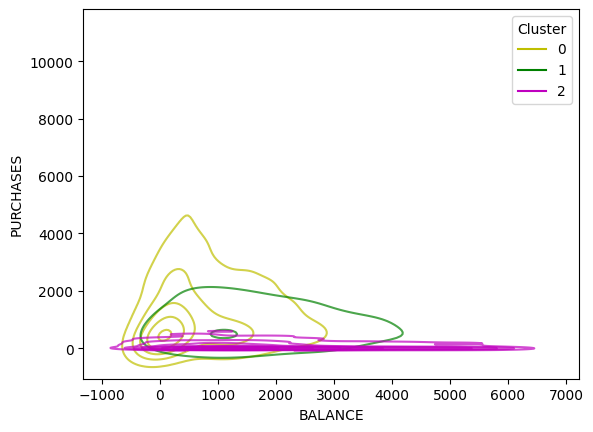

In [ ]:
sns.kdeplot(data=creditcard_df_no_outlier, x="BALANCE", y="PURCHASES", hue="Cluster", palette={0 : 'y', 1 : 'g', 2 : 'm', 3 : 'k'}, alpha=.7, height=20)

In [ ]:
plt.figure(figsize=(20,20))
creditcard_df_no_outlier["Cluster"] = creditcard_df_no_outlier["Cluster"].astype('category')

<Figure size 2000x2000 with 0 Axes>

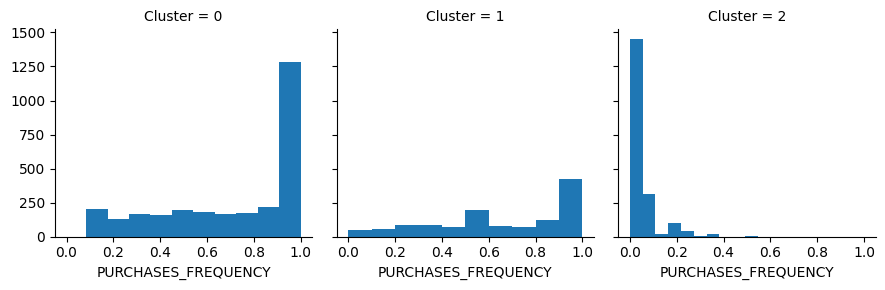

In [ ]:

grid = sns.FacetGrid(creditcard_df_no_outlier, col='Cluster')
grid.map(plt.hist, 'PURCHASES_FREQUENCY')


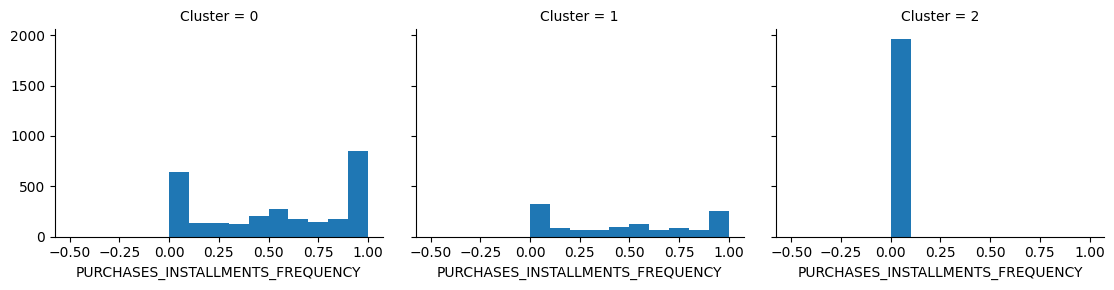

In [ ]:
grid = sns.FacetGrid(creditcard_df_no_outlier, col='Cluster' ,aspect =1.25)
grid.map(plt.hist, 'PURCHASES_INSTALLMENTS_FREQUENCY')
plt.subplots_adjust(wspace=0.1)
plt.show()

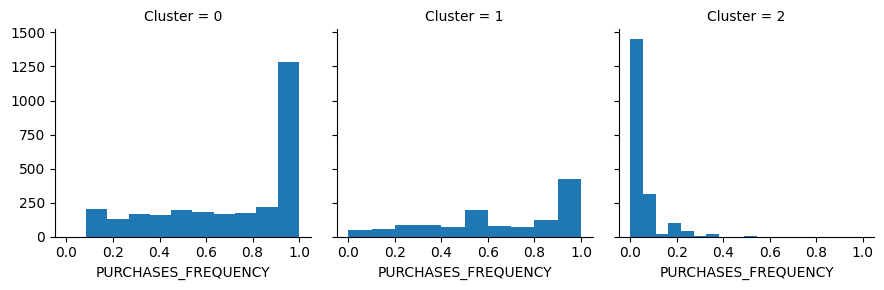

In [ ]:
grid = sns.FacetGrid(creditcard_df_no_outlier, col='Cluster')
plt.subplots_adjust(hspace=0.4, wspace=0.4)
# sns.set(rc={'figure.figsize':(30,30)})
grid.map(plt.hist, 'PURCHASES_FREQUENCY')

plt.show()

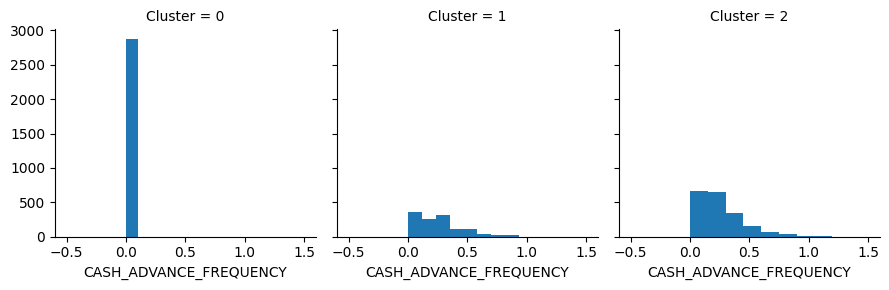

In [ ]:
grid = sns.FacetGrid(creditcard_df_no_outlier, col='Cluster')

grid.map(plt.hist, 'CASH_ADVANCE_FREQUENCY')

plt.show()